# Role R Likelihood-free Simulation Based Inference

In [1]:
%load_ext autoreload
%autoreload 2

from roler.model import ModelPrior
from roler.distributions import *

/Users/micahtilton/Documents/GitHub/likelihood-free-inference/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Defining the Model Prior

This cell defines the prior distributions and fixed values for the simulation model using the `ModelPrior` class. This object will be used to sample parameter values for each simulation run.

In [2]:
prior = ModelPrior(
    individuals_local=IntDistribution(50, 300),
    individuals_meta=IntDistribution(400, 1000),
    species_meta=50,
    speciation_local=0.05,
    speciation_meta=0.05,
    extinction_meta=0.05,
    env_sigma=0.5,
    trait_sigma=1,
    comp_sigma=0.5,
    dispersal_prob=0.1,
    mutation_rate=0.01,
    equilib_escape=1,
    num_basepairs=250,
    init_type='oceanic_island',
    niter=20000,
    niterTimestep=10
)

TypeError: ModelPrior.__init__() got an unexpected keyword argument 'individuals_meta'

In [ ]:
prior = ModelPrior(
    individuals_local=IntDistribution(50, 300),
    individuals_meta=IntDistribution("individuals_meta", 1000),
    speciation_meta=0.05,
    extinction_meta=0.05,
    niter=20000,
    niterTimestep=10
)

In [33]:
uniform = prior.get_joint_uniform()
sample = uniform.sample()
print(sample)

tensor([ 82.3919, 917.3896, 992.6756,   0.9942])


In [34]:
prior.get_params_from_tensor(sample)

ModelParams(individuals_local=82, individuals_meta=917, species_meta=993, speciation_local=0.9942167401313782, speciation_meta=0.05, extinction_meta=0.05, env_sigma=0.5, trait_sigma=1, comp_sigma=0.5, dispersal_prob=0.1, mutation_rate=0.01, equilib_escape=1, num_basepairs=250, init_type='oceanic_island', niter=20000, niterTimestep=10)

## Running a Single Simulation and Extracting Summary Statistics

This cell executes a single simulation run. First, it initializes a `Simulator` object. Then, it samples a set of parameter values (`theta`) from the `prior` distribution defined in the previous cell. Finally, it runs the simulation using these sampled parameters and stores the resulting summary statistics in the `stats` variable. The `stats` variable is then printed to display the simulation output.

In [15]:
from roler.simulation import Simulator

simulator = Simulator()
theta = prior.sample()
stats = simulator.simulate(theta)
stats

R[write to console]: Using GitHub PAT from the git credential store.



Installing the 'roleR' R package from GitHub...


R[write to console]: Skipping install of 'roleR' from a github remote, the SHA1 (cc6546a1) has not changed since last install.
  Use `force = TRUE` to force installation



,hill_abund_1,hill_abund_2,hill_abund_3,hill_abund_4,hill_gen_1,hill_gen_2,hill_gen_3,hill_gen_4,hill_trait_1,hill_trait_2,hill_trait_3,hill_trait_4,hill_phy_1,hill_phy_2,hill_phy_3,hill_phy_4,richness,iteration
1,1.000000,1.000000,1.000000,1.000000,1.0,inf,inf,inf,NaN,NaN,NaN,NaN,1,2,3,4,1,0.0
2,1.085318,1.027872,1.020905,1.018561,1.0,inf,inf,inf,12.288123,12.190888,12.178855,12.174792,1,2,3,4,3,10.0
3,1.215104,1.071802,1.053658,1.047559,1.0,inf,inf,inf,10.475486,9.849676,9.583395,9.398694,1,2,3,4,5,20.0
4,1.305684,1.102628,1.076479,1.067704,1.0,inf,inf,inf,10.239388,9.523377,9.312366,9.186464,1,2,3,4,6,30.0
5,1.460749,1.151469,1.112291,1.099222,1.0,inf,inf,inf,10.852278,9.783607,9.512071,9.359168,1,2,3,4,8,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,17.761049,10.658000,7.689903,6.394210,1.0,inf,inf,inf,19.146536,13.374450,11.049208,9.935524,1,2,3,4,32,19960.0
1998,17.669318,11.090531,8.216348,6.866524,1.0,inf,inf,inf,18.692686,13.301414,11.151575,10.114152,1,2,3,4,32,19970.0
1999,17.667825,11.435622,8.542201,7.136278,1.0,inf,inf,inf,18.234371,13.314085,11.282301,10.272765,1,2,3,4,31,19980.0
2000,18.252737,11.789823,8.661209,7.170640,1.0,inf,inf,inf,18.682261,13.853532,11.765990,10.749410,1,2,3,4,31,19990.0


## Graphing Richness over Iteration

Matplotlib is building the font cache; this may take a moment.


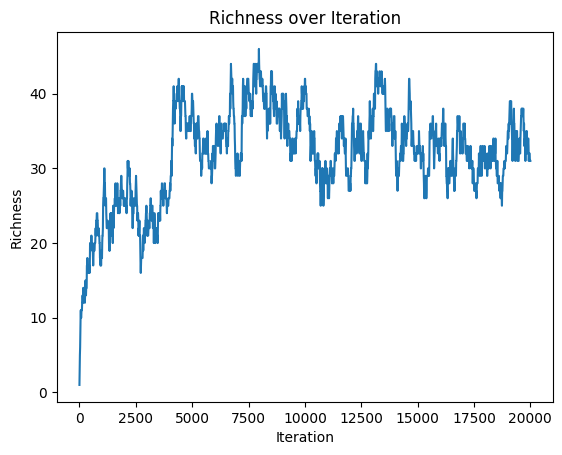

In [16]:
import matplotlib.pyplot as plt

plt.plot(stats['iteration'], stats['richness'])
plt.xlabel('Iteration')
plt.ylabel('Richness')
plt.title('Richness over Iteration')
plt.show()